# Project Name: Exploratory Data Analysis with t-SNE: Visualizing High-Dimensional Data Using the Digits Dataset

**Overview:**
This project introduces students to advanced exploratory data analysis using t-distributed Stochastic Neighbor Embedding (t-SNE), a powerful nonlinear dimensionality reduction technique. Students will apply t-SNE to the digits dataset and visualize the resulting 2D embeddings to discover natural groupings and patterns.

**You have:**
* The Digits dataset containing 8x8 images of handwritten digits (0-9), with each image represented as a high-dimensional feature vector.
* Basic knowledge of Python, NumPy, matplotlib, and scikit-learn.

**We will:**
1. Preprocess the digits dataset by scaling features and preparing the data for t-SNE.
2. Apply t-SNE to reduce the dimensionality of the dataset from 64 dimensions to 2 dimensions.
3. Visualize the 2D embeddings using scatter plots, coloring points based on their digit labels to reveal structure and cluster patterns.

**Goal:**
Students will understand how t-SNE can uncover hidden structures in complex datasets, enabling more intuitive exploratory data analysis and providing insights that guide further data modeling or hypothesis generation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import base64
from IPython.display import display, HTML
import os
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

## Notebook utility

In [2]:
prefix_path = "../img/"
image_paths = ["tSNE{}.png".format(i) for i in range(1,7)] + ["tSNE7.jpg","tSNE8.jpg"]
image_size = [700, 700, 700, 700, 700, 700, 700, 700]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(prefix_path+path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open(prefix_path+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background

#### What is t-SNE?
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a powerful dimensionality reduction technique specifically designed for visualizing high-dimensional data. Developed by Laurens van der Maaten and Geoffrey Hinton in 2008, it's particularly effective at preserving local structures in the data while revealing global patterns like clusters.

#### Core Concepts of t-SNE
- Similarity Representation t-SNE works by converting high-dimensional Euclidean distances between points into conditional probabilities that represent similarities:
- High-dimensional similarities (P): Uses a Gaussian distribution where similar points have high probability of being selected as neighbors
- Low-dimensional similarities (Q): Uses a Student's t-distribution (heavier tails) to avoid the "crowding problem"


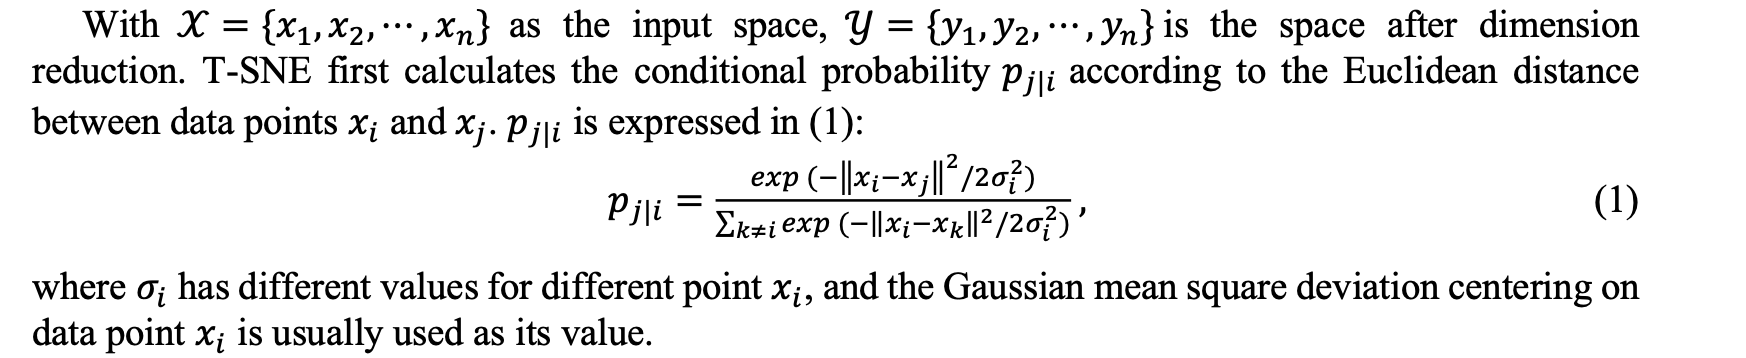

In [3]:
display(HTML(images_html[0]))


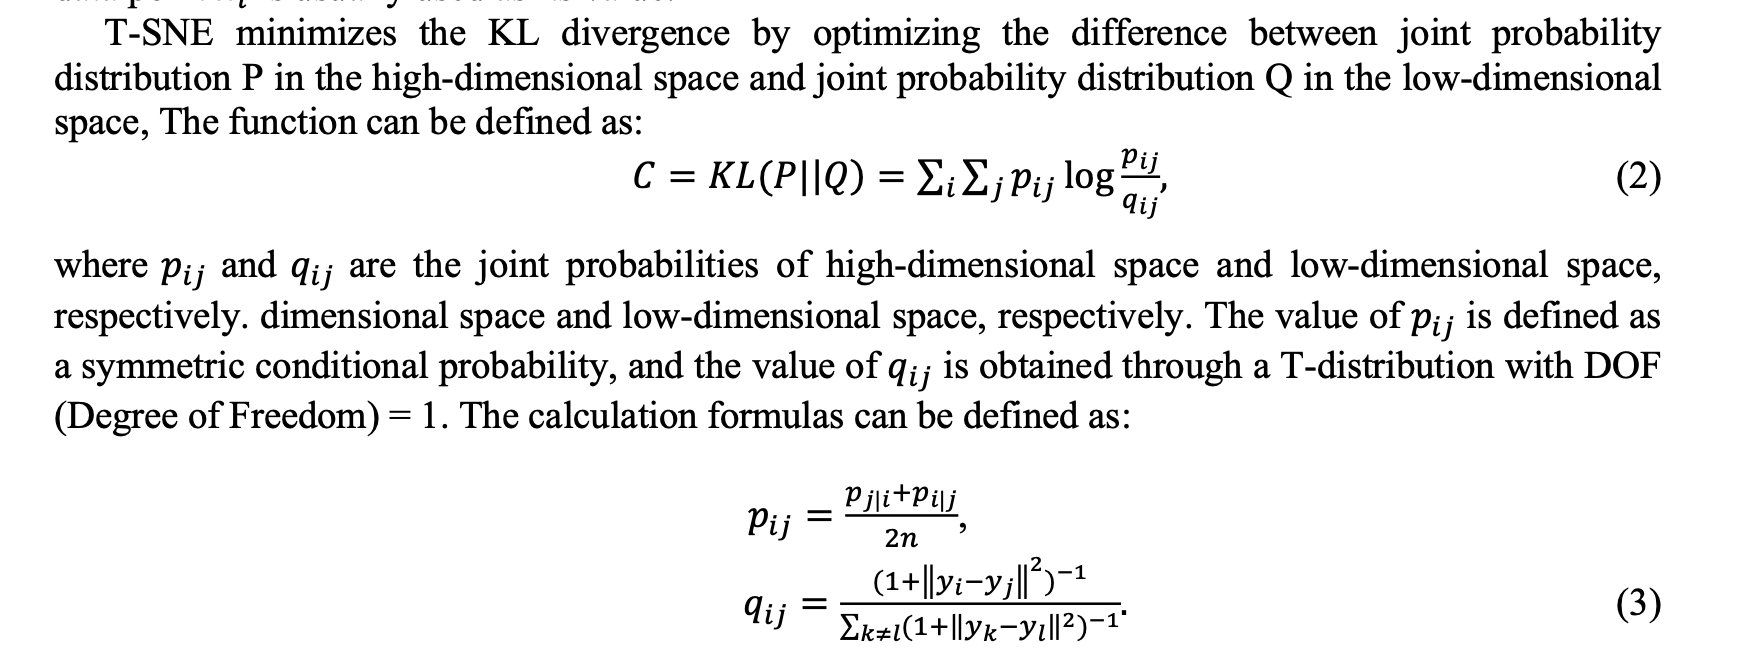

In [4]:
display(HTML(images_html[1]))


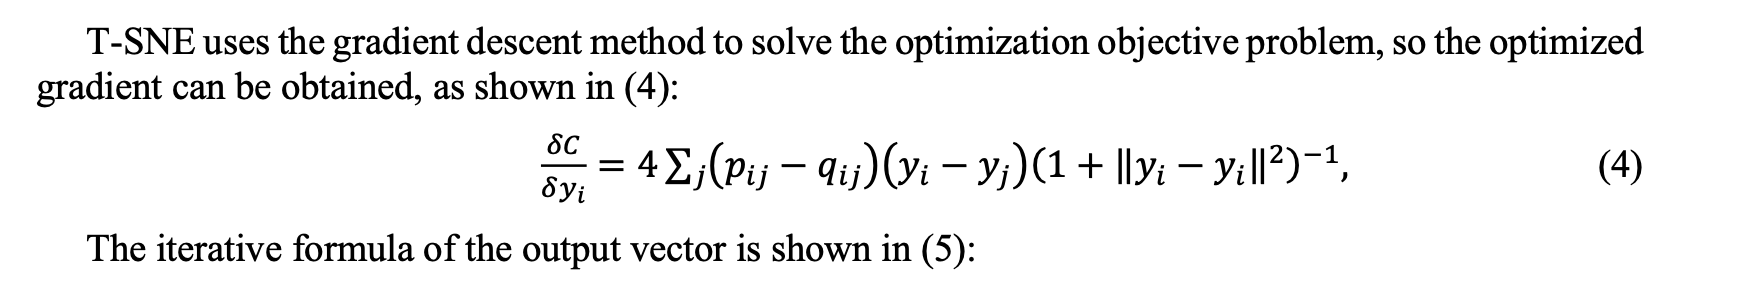

In [5]:
display(HTML(images_html[2]))


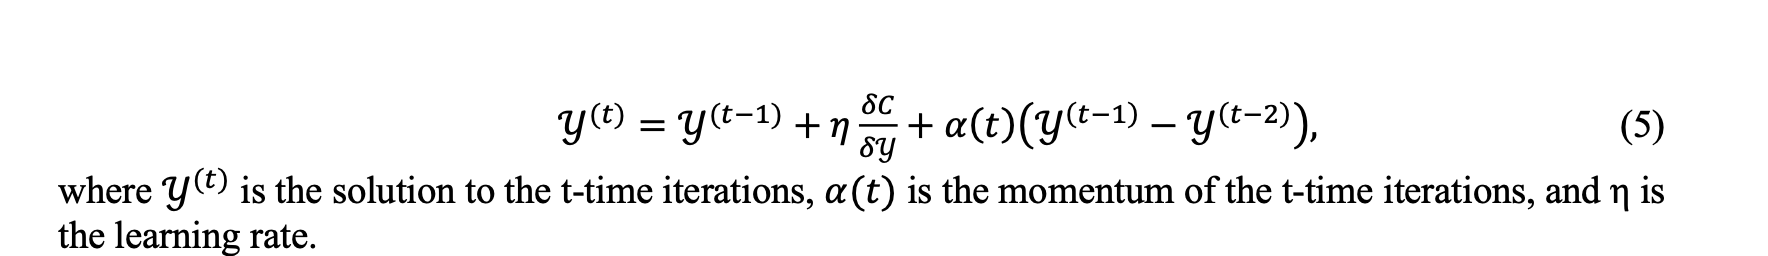

In [6]:
display(HTML(images_html[3]))


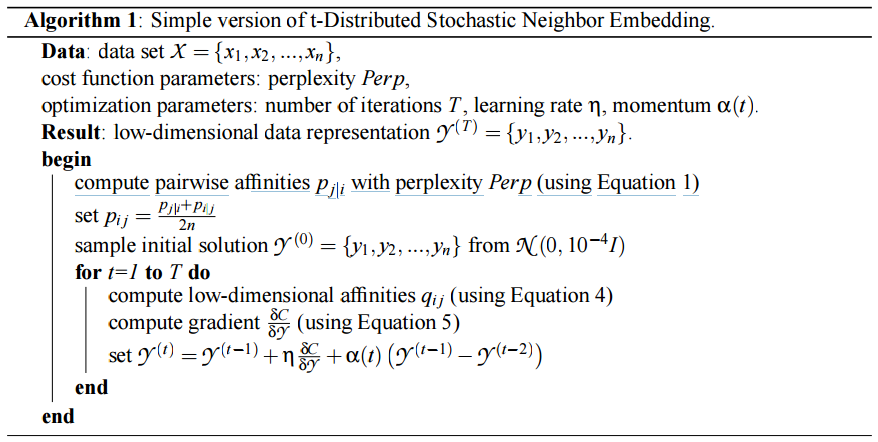

In [9]:
display(HTML(images_html[5]))


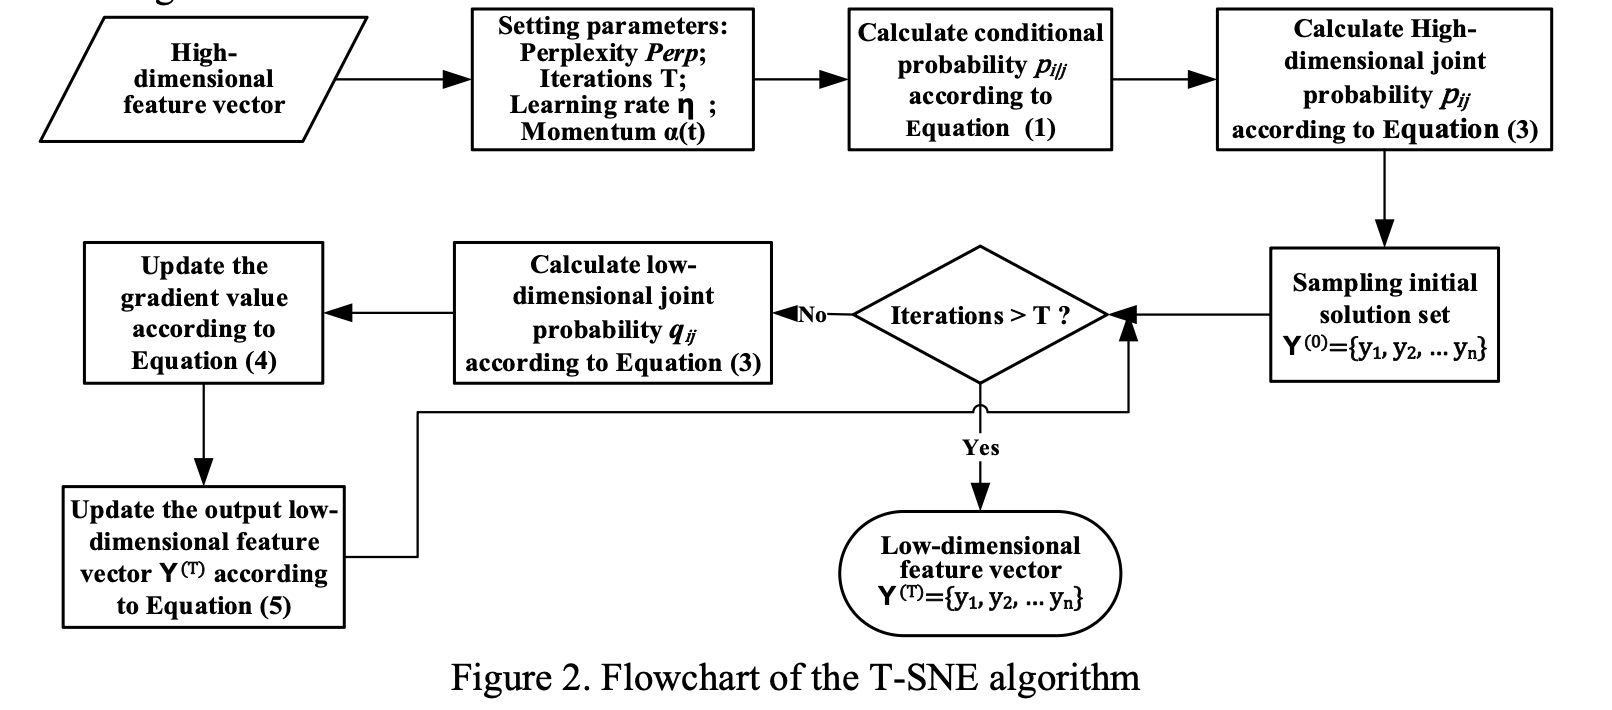

In [10]:
display(HTML(images_html[4]))


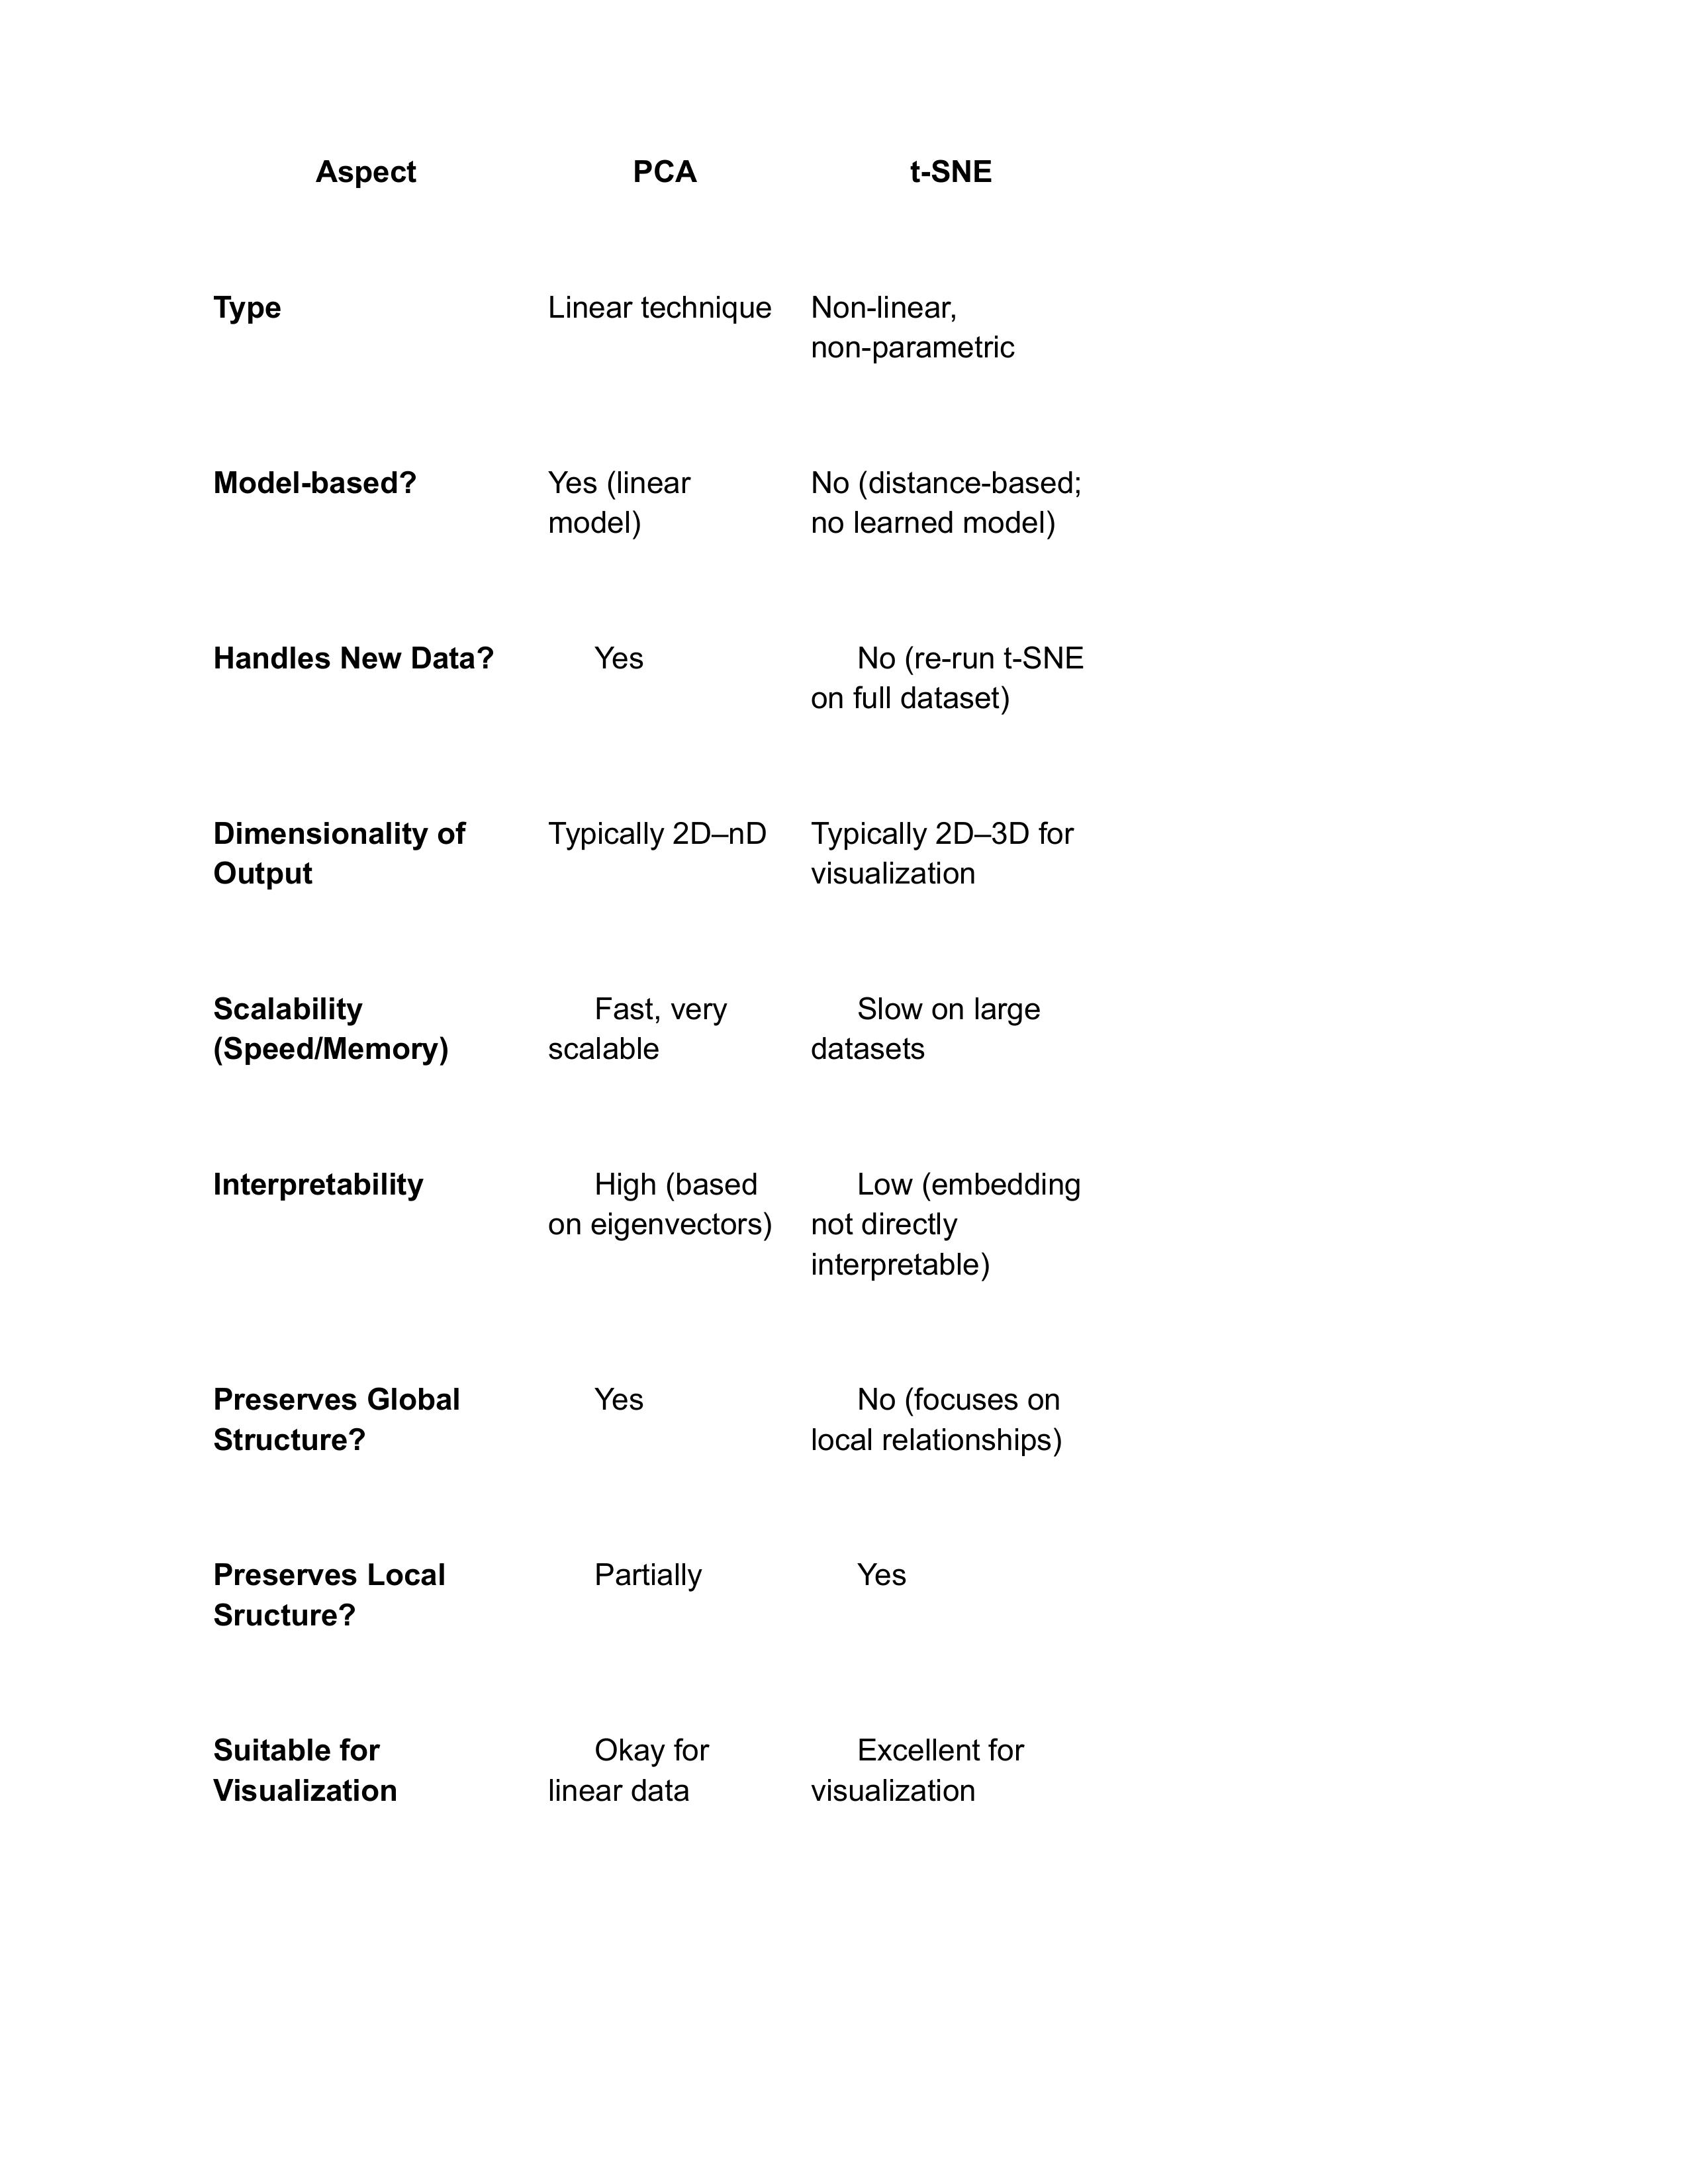

In [11]:
display(HTML(images_html[6]))


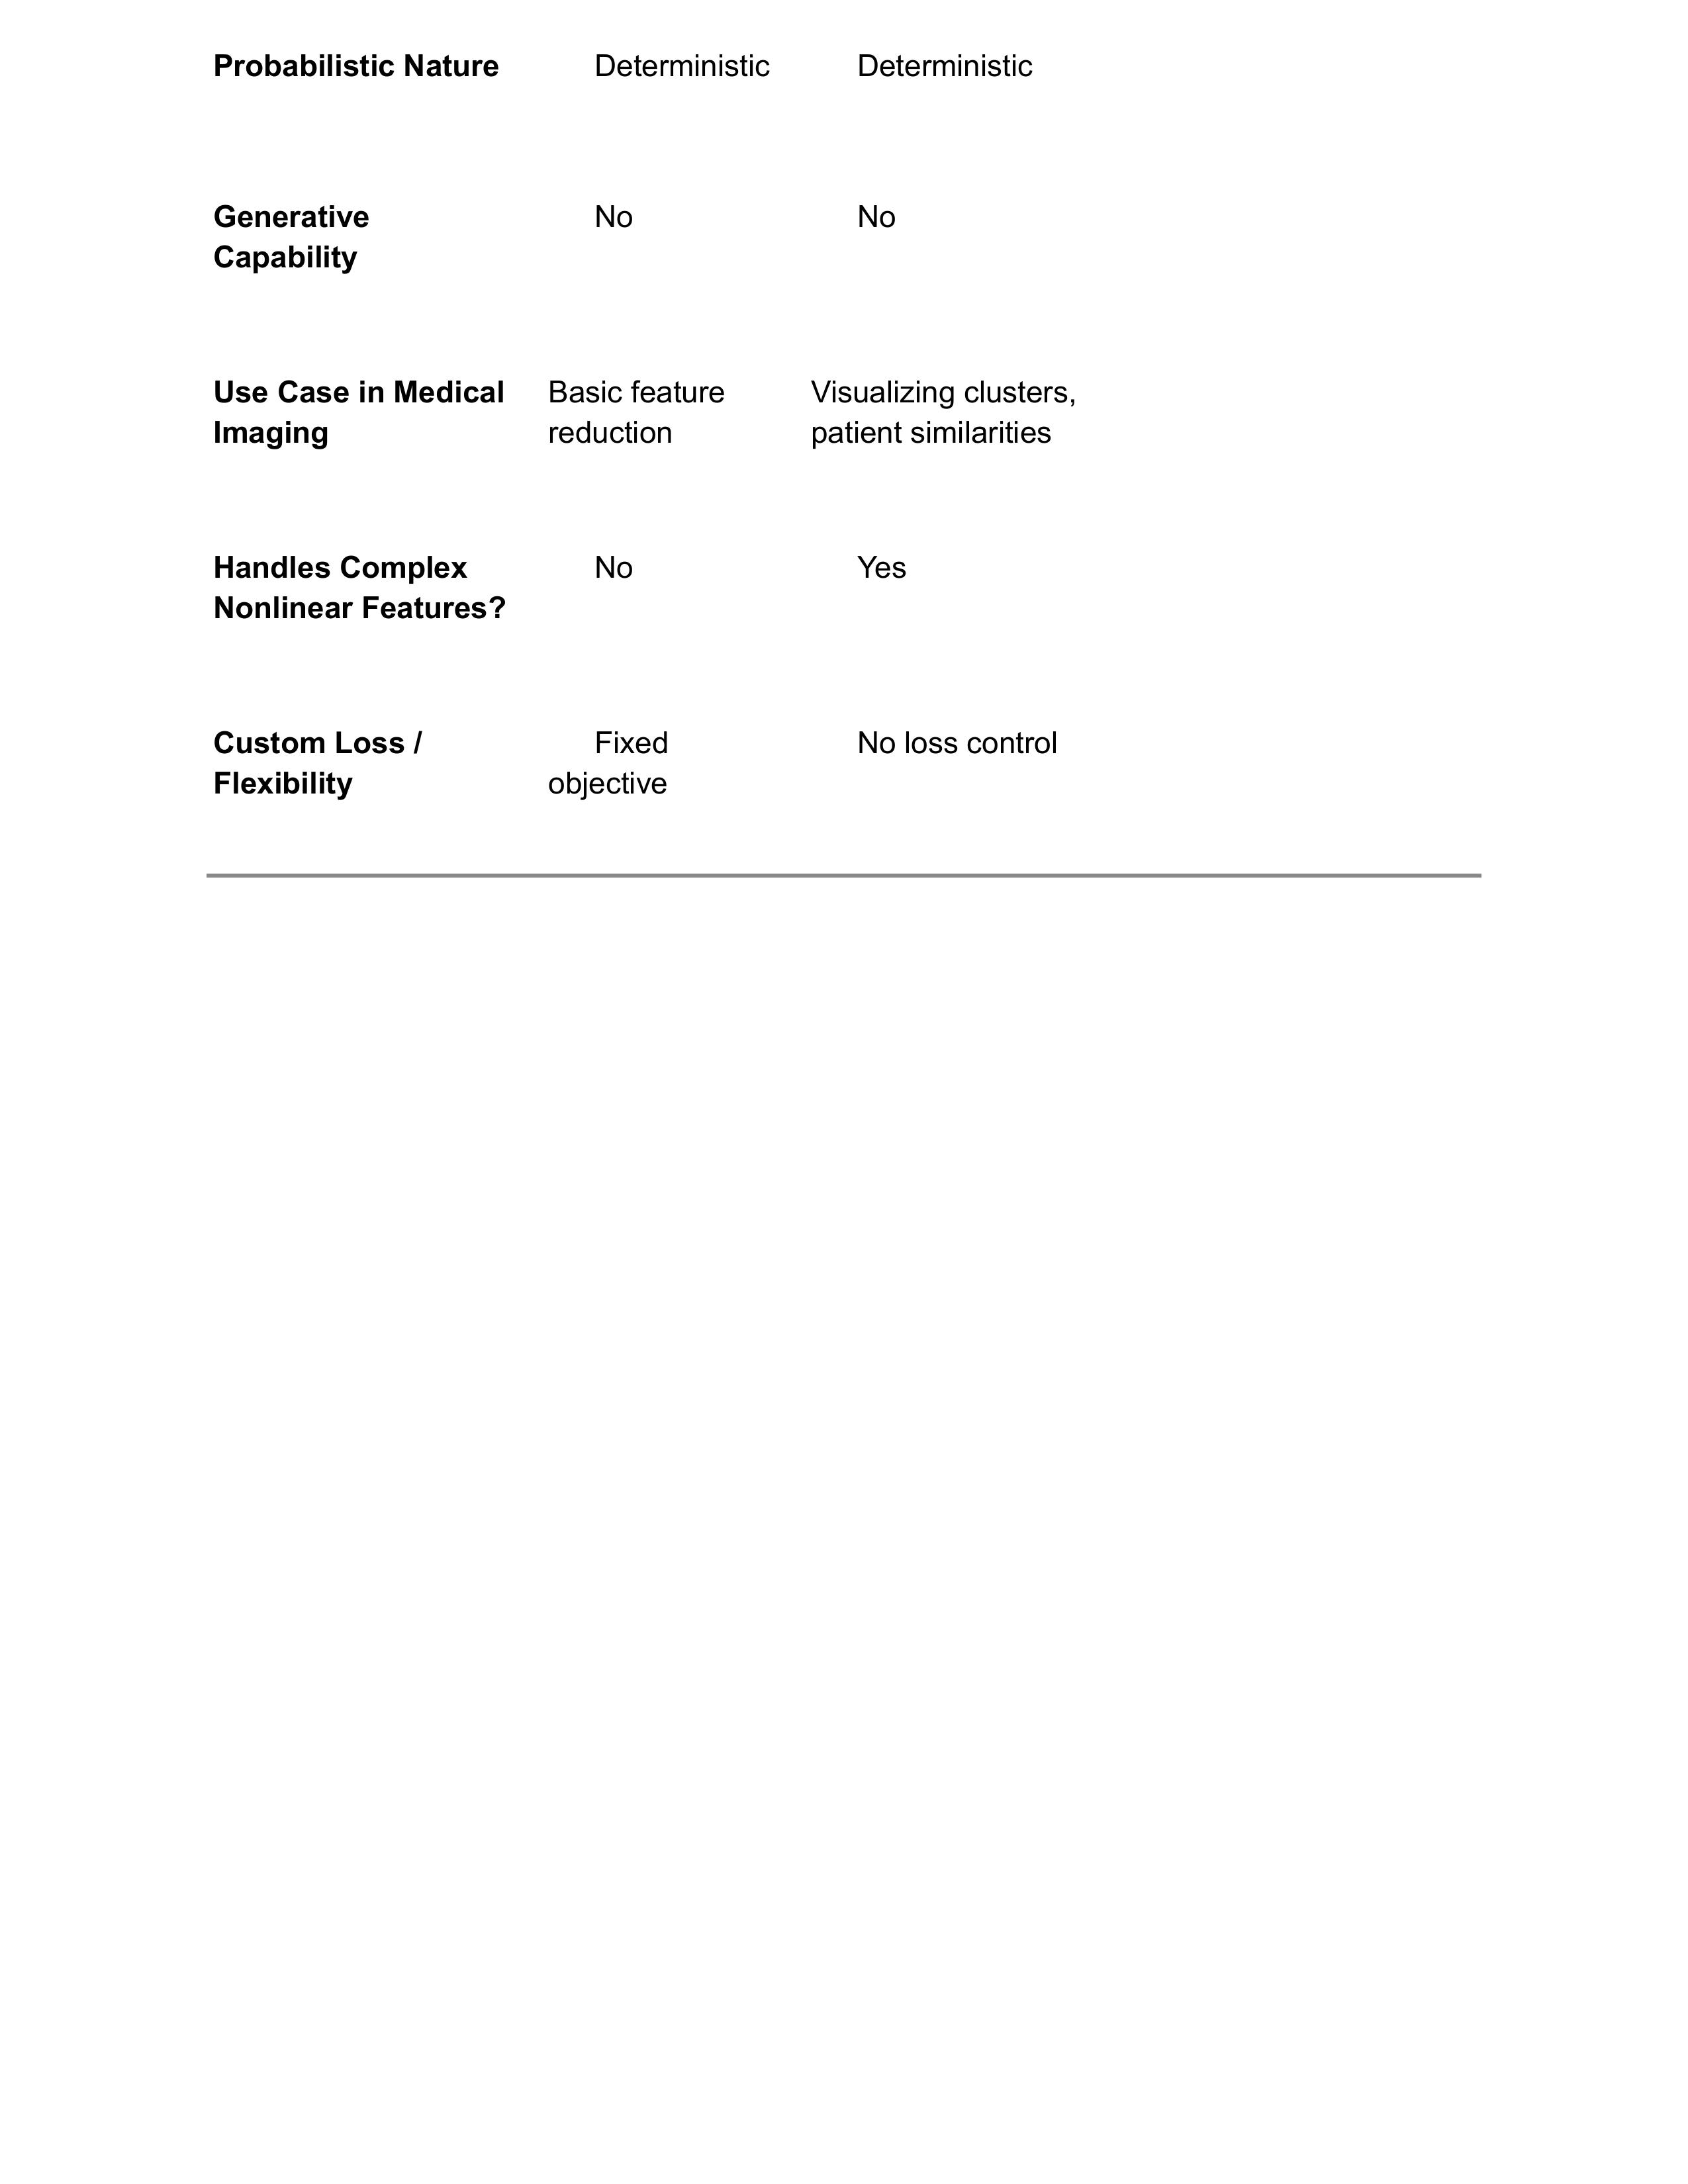

In [12]:
display(HTML(images_html[7]))

## Loading and exploring dataset

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (dimensions): {X.shape[1]}")
print(f"Target classes: {np.unique(y)}")
print(f"Data type: {X.dtype}")
print(f"Feature value range: [{X.min():.1f}, {X.max():.1f}]")

print(f"\nClass distribution:")
unique, counts = np.unique(y, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples")

Dataset shape: (1797, 64)
Number of samples: 1797
Number of features (dimensions): 64
Target classes: [0 1 2 3 4 5 6 7 8 9]
Data type: float64
Feature value range: [0.0, 16.0]

Class distribution:
  Digit 0: 178 samples
  Digit 1: 182 samples
  Digit 2: 177 samples
  Digit 3: 183 samples
  Digit 4: 181 samples
  Digit 5: 182 samples
  Digit 6: 181 samples
  Digit 7: 179 samples
  Digit 8: 174 samples
  Digit 9: 180 samples


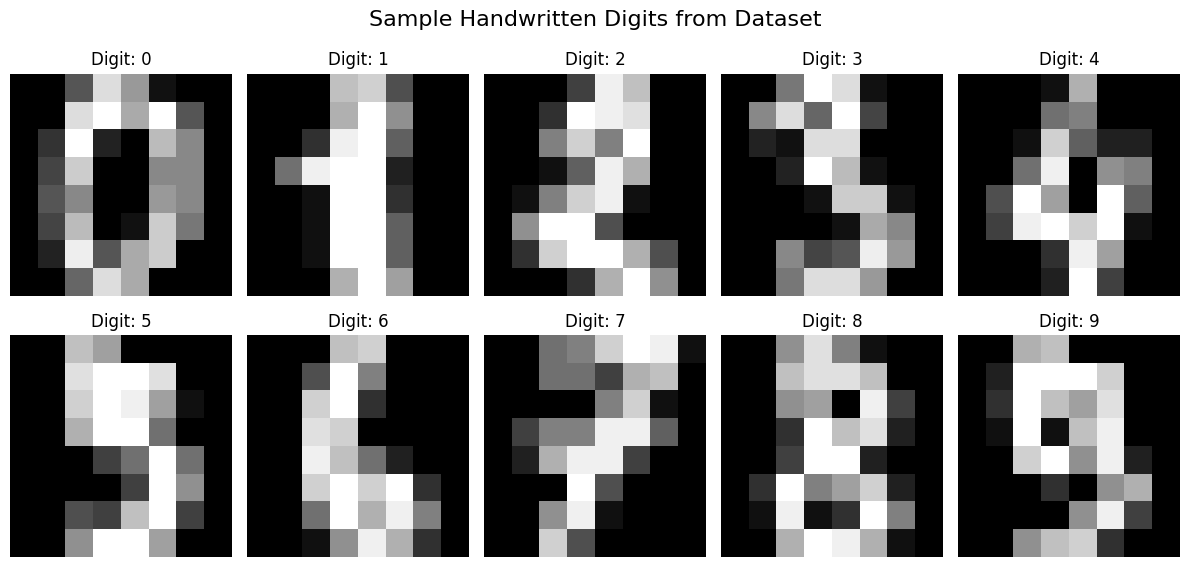

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample Handwritten Digits from Dataset', fontsize=16)

for i, ax in enumerate(axes.flat):
    digit_image = X[i].reshape(8, 8)
    ax.imshow(digit_image, cmap='gray')
    ax.set_title(f'Digit: {y[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Data Normalization

In [4]:
print("Original data statistics:")
print(f"  Mean: {X.mean():.2f}")
print(f"  Standard deviation: {X.std():.2f}")
print(f"  Min: {X.min():.2f}, Max: {X.max():.2f}")

# Apply StandardScaler (z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nAfter scaling:")
print(f"  Mean: {X_scaled.mean():.2f}")
print(f"  Standard deviation: {X_scaled.std():.2f}")
print(f"  Min: {X_scaled.min():.2f}, Max: {X_scaled.max():.2f}")

print(f"\nApplying PCA to reduce from {X_scaled.shape[1]} to 50 dimensions...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance ratio (first 10 components): {pca.explained_variance_ratio_[:10]}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.3f}")

Original data statistics:
  Mean: 4.88
  Standard deviation: 6.02
  Min: 0.00, Max: 16.00

After scaling:
  Mean: 0.00
  Standard deviation: 0.98
  Min: -3.01, Max: 42.38

Applying PCA to reduce from 64 to 50 dimensions...
Explained variance ratio (first 10 components): [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003]
Total explained variance: 0.983


#### Why scaling is important for t-SNE:
1. t-SNE is distance-based: features with larger scales dominate the calculation
2. Pixel values range from 0-16, which is relatively small, but scaling ensures consistency
3. Standardization (z-score normalization) centers data around 0 with unit variance


## Applying t-SNE

In [5]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,  
    n_iter=1000,
    random_state=42,
    verbose=1
)

print(f"\nRunning t-SNE on {X_pca.shape[0]} samples...")


Running t-SNE on 1797 samples...


In [6]:
X_tsne = tsne.fit_transform(X_pca)

print(f"t-SNE completed! Final KL divergence: {tsne.kl_divergence_:.2f}")
print(f"Output shape: {X_tsne.shape}")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.344948
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.280365
[t-SNE] KL divergence after 1000 iterations: 0.820507
t-SNE completed! Final KL divergence: 0.82
Output shape: (1797, 2)


## Visualization

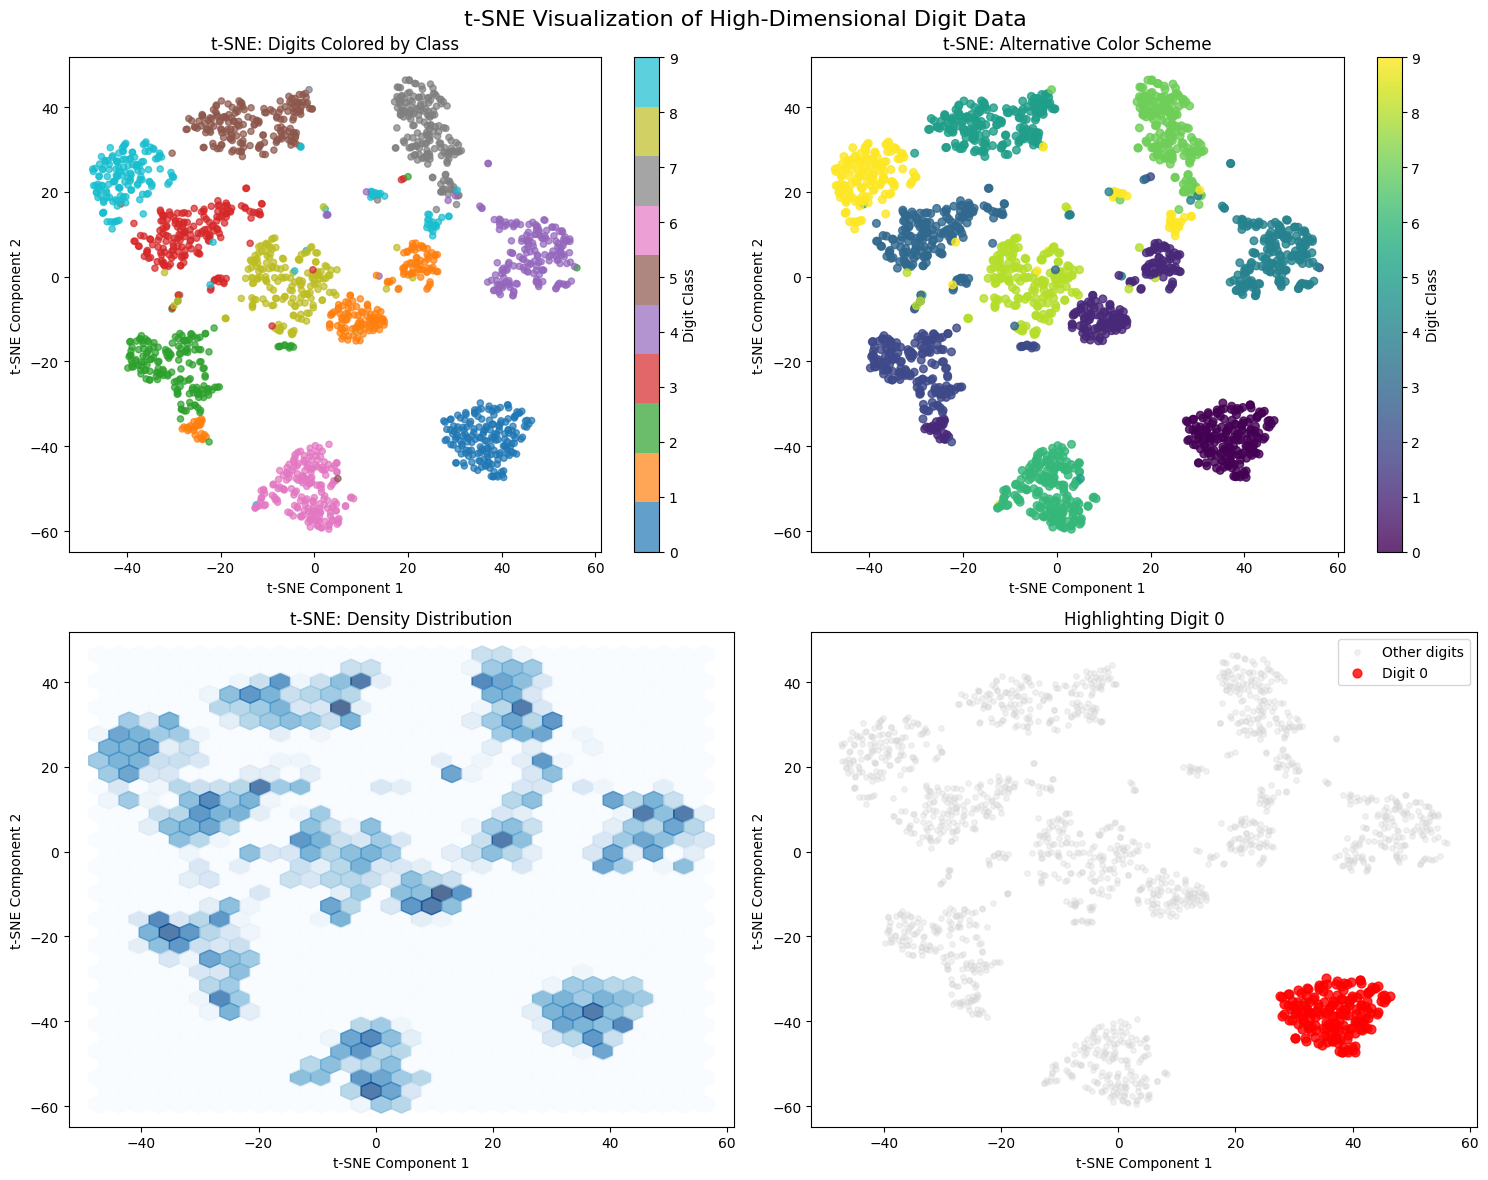

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('t-SNE Visualization of High-Dimensional Digit Data', fontsize=16)

# Plot 1: Basic scatter plot with class colors
scatter1 = axes[0,0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7, s=20)
axes[0,0].set_title('t-SNE: Digits Colored by Class')
axes[0,0].set_xlabel('t-SNE Component 1')
axes[0,0].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter1, ax=axes[0,0], label='Digit Class')

# Plot 2: Larger points with different styling
scatter2 = axes[0,1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.8, s=30)
axes[0,1].set_title('t-SNE: Alternative Color Scheme')
axes[0,1].set_xlabel('t-SNE Component 1')
axes[0,1].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter2, ax=axes[0,1], label='Digit Class')

# Plot 3: Density plot to show clustering patterns
axes[1,0].hexbin(X_tsne[:, 0], X_tsne[:, 1], gridsize=30, cmap='Blues', alpha=0.7)
axes[1,0].set_title('t-SNE: Density Distribution')
axes[1,0].set_xlabel('t-SNE Component 1')
axes[1,0].set_ylabel('t-SNE Component 2')

# Plot 4: Individual class highlighting
highlight_digit = 0
mask = (y == highlight_digit)
axes[1,1].scatter(X_tsne[~mask, 0], X_tsne[~mask, 1], c='lightgray', alpha=0.3, s=15, label='Other digits')
axes[1,1].scatter(X_tsne[mask, 0], X_tsne[mask, 1], c='red', alpha=0.8, s=40, label=f'Digit {highlight_digit}')
axes[1,1].set_title(f'Highlighting Digit {highlight_digit}')
axes[1,1].set_xlabel('t-SNE Component 1')
axes[1,1].set_ylabel('t-SNE Component 2')
axes[1,1].legend()

plt.tight_layout()
plt.show()

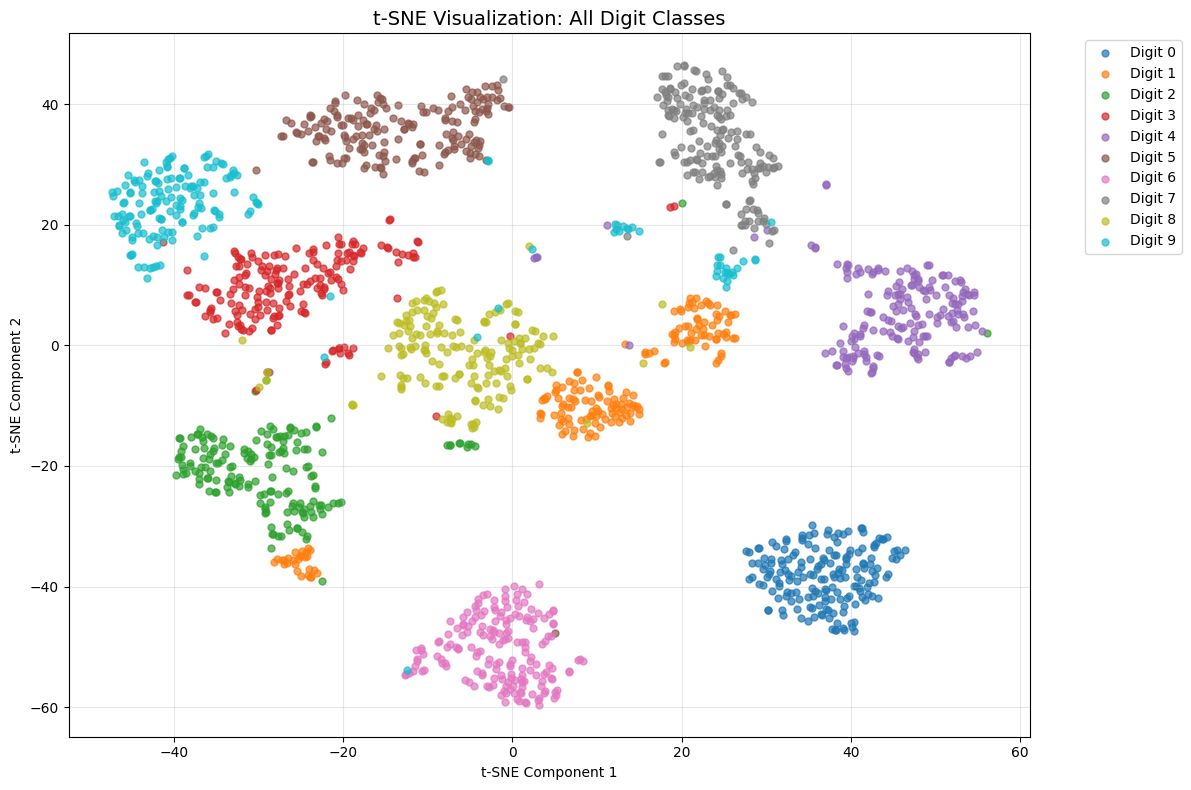

In [8]:
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for digit in range(10):
    mask = (y == digit)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
               c=[colors[digit]], label=f'Digit {digit}', 
               alpha=0.7, s=25)

plt.title('t-SNE Visualization: All Digit Classes', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
for digit in range(10):
    digit_points = X_tsne[y == digit]
    centroid = digit_points.mean(axis=0)
    spread = np.std(digit_points, axis=0).mean()
    print(f"   Digit {digit}: Centroid at ({centroid[0]:.1f}, {centroid[1]:.1f}), Spread: {spread:.1f}")

total_variance = np.var(X_tsne, axis=0).sum()
print(f"   Total variance in 2D space: {total_variance:.1f}")

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_tsne, y)
print(f"   Silhouette score (cluster quality): {silhouette_avg:.3f}")
print("   (Range: -1 to 1, higher is better separation)")


   Digit 0: Centroid at (36.8, -38.1), Spread: 4.4
   Digit 1: Centroid at (8.7, -9.3), Spread: 14.2
   Digit 2: Centroid at (-28.2, -20.5), Spread: 8.5
   Digit 3: Centroid at (-25.4, 9.7), Spread: 7.0
   Digit 4: Centroid at (44.9, 5.6), Spread: 7.2
   Digit 5: Centroid at (-13.4, 35.1), Spread: 7.8
   Digit 6: Centroid at (-1.4, -50.4), Spread: 4.9
   Digit 7: Centroid at (23.8, 34.0), Spread: 5.8
   Digit 8: Centroid at (-6.0, -1.5), Spread: 6.5
   Digit 9: Centroid at (-28.6, 21.2), Spread: 16.1
   Total variance in 2D space: 1571.7
   Silhouette score (cluster quality): 0.494
   (Range: -1 to 1, higher is better separation)


#### KEY CONCEPTS:

1. NON-LINEAR DIMENSIONALITY REDUCTION:
- t-SNE preserves local neighborhoods, not global distances
- Unlike PCA, it can capture complex non-linear relationships
- The algorithm models both high-D and low-D data as probability distributions

2. LOCAL STRUCTURE PRESERVATION:
- Points close in high-D space remain close in 2D visualization
- Global distances may be distorted - don't interpret absolute positions
- Focus on clusters and local neighborhoods, not overall layout

3. STOCHASTIC NATURE:
- Algorithm uses random initialization and gradient descent
- Different runs may produce different layouts (but similar patterns)
- Random state ensures reproducibility for educational purposes

4. PARAMETER EFFECTS:
- Perplexity: Higher values preserve more global structure
- Learning rate: Affects convergence speed and stability
- Iterations: More iterations = better optimization (to a point)

5. IMPORTANT LIMITATIONS:
- Cluster sizes in t-SNE don't reflect actual cluster sizes
- Distances between distant clusters are not meaningful
- The algorithm is computationally expensive O(n²)
- Results can vary between runs (use random_state for consistency)
- Not suitable for very large datasets without sampling

6. BEST PRACTICES:
- Always preprocess/scale your data
- Try different perplexity values (5-50)
- Run multiple times to ensure consistent patterns
- Use PCA preprocessing for very high-dimensional data
- Interpret clusters and local structure, not global positions